# JAGS Model Building and Execution 

In [1]:
library("rjags")

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Specify the model

First of all, we need to specify the hierarchical structure of the model, we'll use the same example as earlier.

$y_i | \mu \overset{\text{i.i.d.}}{\sim} N(\mu, 1) $ where $i = 1,...,n$

$\mu \sim t(0,1,1)$

In [10]:
mod_string = "model{

    for (i in 1:n) {
        
        y[i] ~ dnorm(mu, 1/sig2)  #sig2 is the variance
        
    }
    
    mu ~ dt(0.0, 1/1.0, 1)

    sig2 = 1.0
    
}"

## Set up the model

In [3]:
y = c(1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9)
n = length(y)

#### Before running the model, we need to tell jags what the data are, what the parameters are and what are the initial values of those parameters.

In [4]:
#name of the data should be the same as in the model specificatios
data_jags = list(y = y, n = n)

params = c("mu")


#### To tell jags the initial value of the parameters, we need to write a function.

In [5]:
inits = function(){
    
    inits = list("mu" = 0)
    
}

Compiling the model through jags

In [11]:
set.seed(50)

In [12]:
mod = jags.model(textConnection(mod_string),data = data_jags, inits = inits)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 1
   Total graph size: 15

Initializing model



## Run the Markov Chain Monte Carlo Sampler

The $\verb|update|$ function below will run the MCMC sampler for 500 iterations, without saving the results anywhere, this gives the Markov Chain some time to find the stationary distribution.

In [13]:
update(mod, 500)

In the next function, we will simulate our markov chain and keep our simulations

In [14]:
mod_sim = coda.samples(model = mod, variable.names = params, n.iter = 1000)

We didn't provide the intial values in the above function because we want it to continue from where it left off after 500 iterations.

## Post Processing

In [15]:
library("coda")

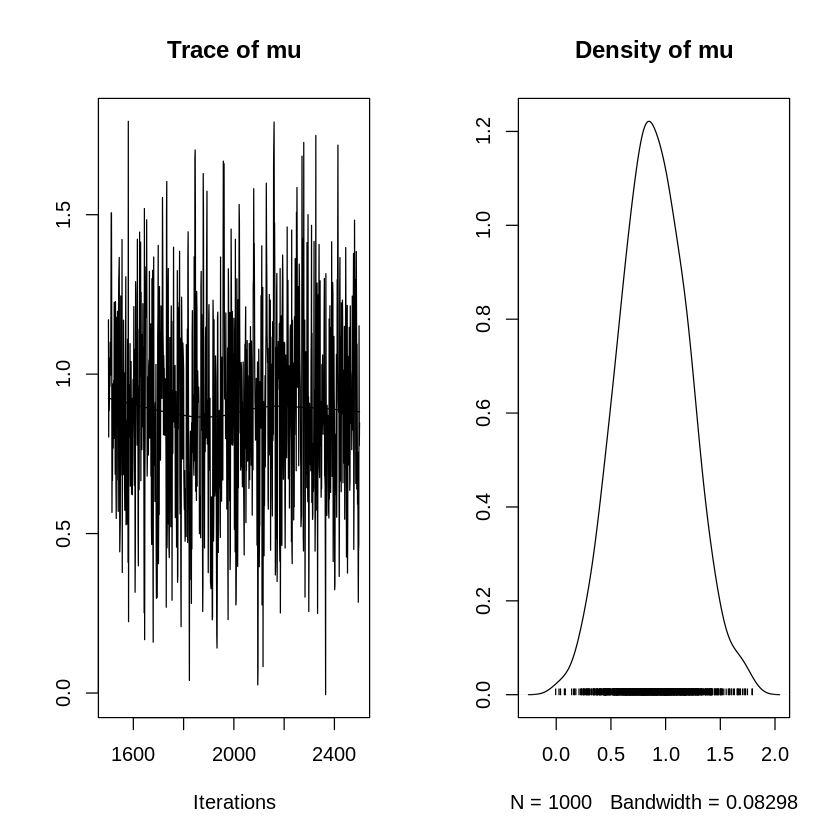

In [16]:
plot(mod_sim)

In [17]:
summary(mod_sim)


Iterations = 1501:2500
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.890976       0.311644       0.009855       0.013080 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.2910 0.6761 0.8866 1.1049 1.5061 
